In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dir_path = '/content/drive/MyDrive/DataScience/Kaggle/Spaceship-Titanic/'
train_df = pd.read_csv(dir_path + 'train.csv')
test_df = pd.read_csv(dir_path + 'test.csv')

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.shape

(8693, 14)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train_df.isnull().sum() / len(train_df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [9]:
train_df = train_df.drop(['Name'],axis=1)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [10]:
train_df['HomePlanet']

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

<Axes: xlabel='HomePlanet', ylabel='count'>

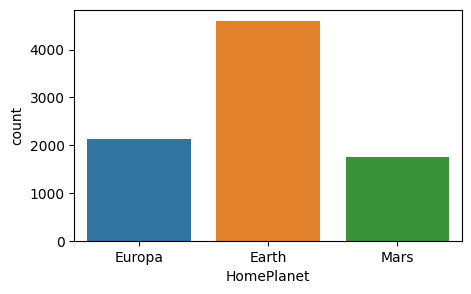

In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(x=train_df['HomePlanet'])

In [12]:
train_df = train_df.fillna({'HomePlanet':train_df['HomePlanet'].mode()[0]})

In [13]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<Axes: xlabel='CryoSleep', ylabel='count'>

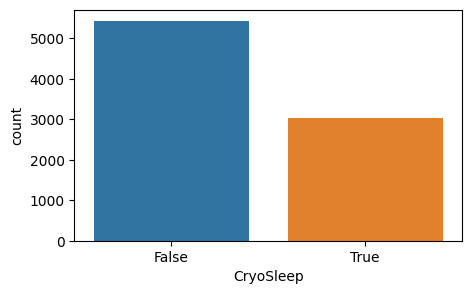

In [14]:
plt.figure(figsize=(5, 3))
sns.countplot(x=train_df['CryoSleep'])

In [15]:
train_df = train_df.fillna({'CryoSleep':train_df['CryoSleep'].mode()[0]})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<Axes: xlabel='Destination', ylabel='count'>

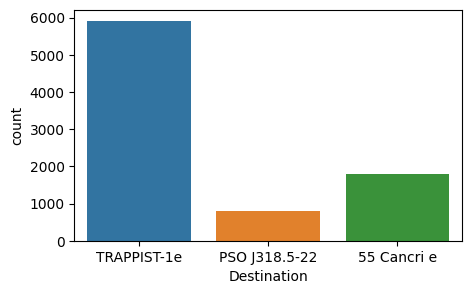

In [16]:
plt.figure(figsize=(5, 3))
sns.countplot(x=train_df['Destination'])

In [17]:
train_df = train_df.fillna({'Destination':train_df['Destination'].mode()[0]})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<Axes: xlabel='VIP', ylabel='count'>

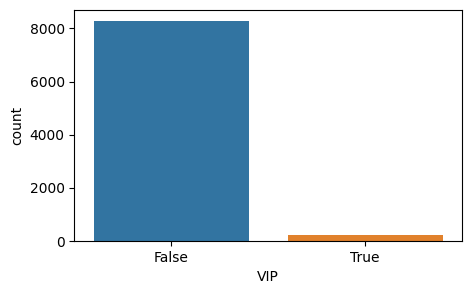

In [18]:
plt.figure(figsize=(5, 3))
sns.countplot(x=train_df['VIP'])

In [19]:
train_df = train_df.fillna({'VIP':train_df['VIP'].mode()[0]})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [20]:
train_df['Age'].mean()

28.82793046746535

In [21]:
train_df['Age'].median()

27.0

<Axes: >

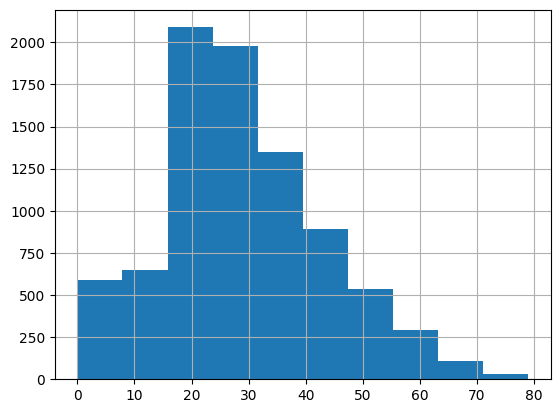

In [22]:
train_df['Age'].hist()

In [23]:
train_df = train_df.fillna({'Age': train_df['Age'].median()})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [24]:
train_df['RoomService'].mean()

224.687617481203

In [25]:
train_df['RoomService'].median()

0.0

<Axes: >

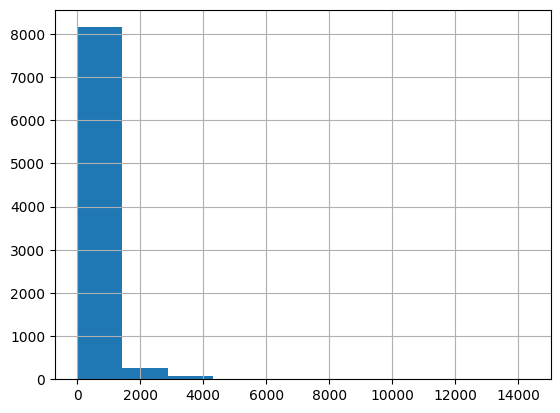

In [26]:
train_df['RoomService'].hist()

In [27]:
train_df = train_df.fillna({'RoomService': train_df['RoomService'].median()})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [28]:
train_df['FoodCourt'].mean()

458.07720329024676

In [29]:
train_df['FoodCourt'].median()

0.0

<Axes: >

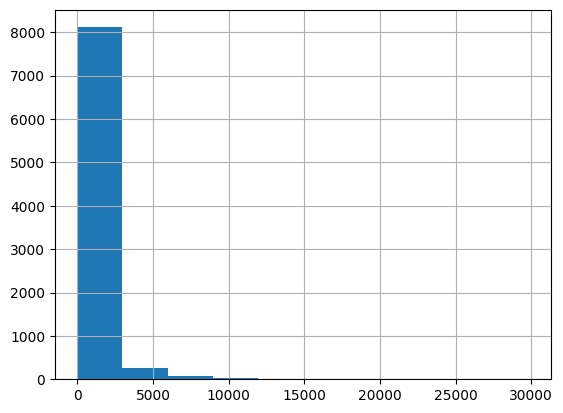

In [30]:
train_df['FoodCourt'].hist()

In [31]:
train_df = train_df.fillna({'FoodCourt': train_df['FoodCourt'].median()})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [32]:
train_df['ShoppingMall'].mean()

173.72916912197996

In [33]:
train_df['ShoppingMall'].median()

0.0

<Axes: >

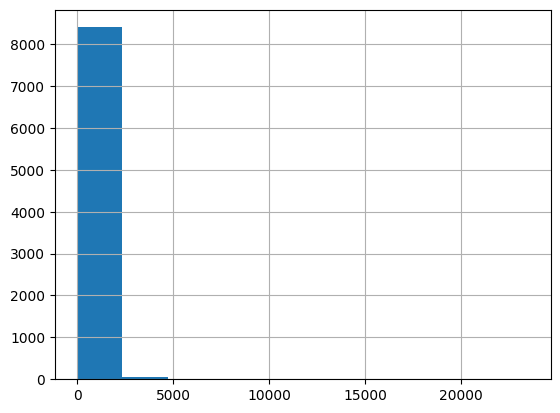

In [34]:
train_df['ShoppingMall'].hist()

In [35]:
train_df = train_df.fillna({'ShoppingMall': train_df['ShoppingMall'].median()})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [36]:
train_df['Spa'].mean()

311.1387779083431

In [37]:
train_df['Spa'].median()

0.0

<Axes: >

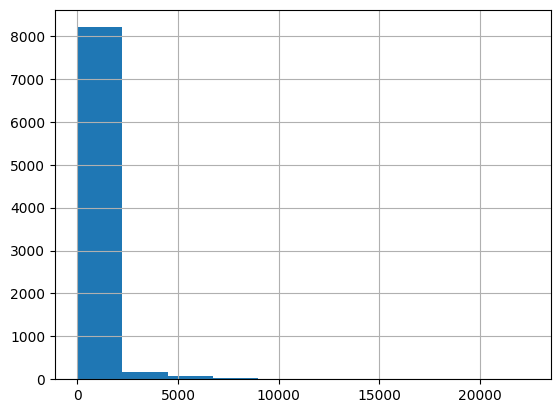

In [38]:
train_df['Spa'].hist()

In [39]:
train_df = train_df.fillna({'Spa': train_df['Spa'].median()})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck          188
Transported       0
dtype: int64

In [40]:
train_df['VRDeck'].mean()

304.8547912992357

In [41]:
train_df['VRDeck'].median()

0.0

<Axes: >

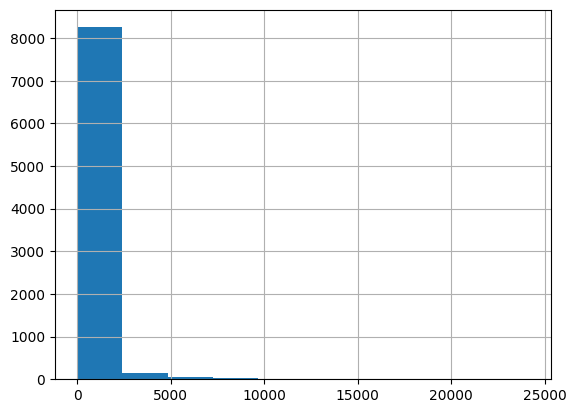

In [42]:
train_df['VRDeck'].hist()

In [43]:
train_df = train_df.fillna({'VRDeck': train_df['VRDeck'].median()})
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [44]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [45]:
train_df[['Deck','Num','Side']] = train_df['Cabin'].str.split('/',expand=True)
train_df = train_df.drop(['Cabin'],axis=1)
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [46]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            199
Num             199
Side            199
dtype: int64

In [47]:
train_df['Deck'].fillna(train_df['Deck'].mode()[0],inplace=True)
train_df['Num'].fillna(train_df['Num'].mode()[0],inplace=True)
train_df['Side'].fillna(train_df['Side'].mode()[0],inplace=True)

train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [48]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [49]:
test_df = test_df.drop(['Name'],axis=1)
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

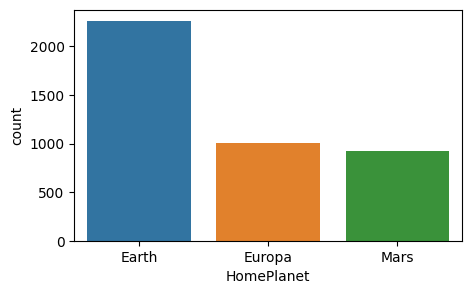

In [50]:
plt.figure(figsize=(5, 3))
sns.countplot(x=test_df['HomePlanet'])

In [51]:
test_df = test_df.fillna({'HomePlanet':test_df['HomePlanet'].mode()[0]})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

<Axes: xlabel='CryoSleep', ylabel='count'>

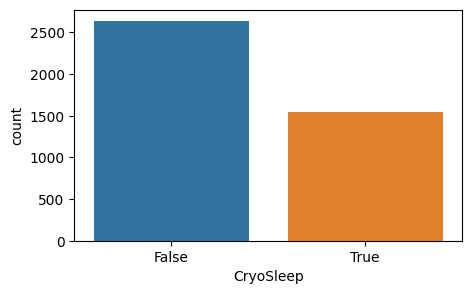

In [52]:
plt.figure(figsize=(5, 3))
sns.countplot(x=test_df['CryoSleep'])

In [53]:
test_df = test_df.fillna({'CryoSleep':test_df['CryoSleep'].mode()[0]})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

<Axes: xlabel='Destination', ylabel='count'>

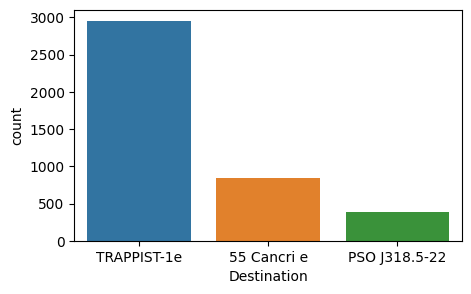

In [54]:
plt.figure(figsize=(5, 3))
sns.countplot(x=test_df['Destination'])

In [55]:
test_df = test_df.fillna({'Destination':test_df['Destination'].mode()[0]})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

<Axes: xlabel='VIP', ylabel='count'>

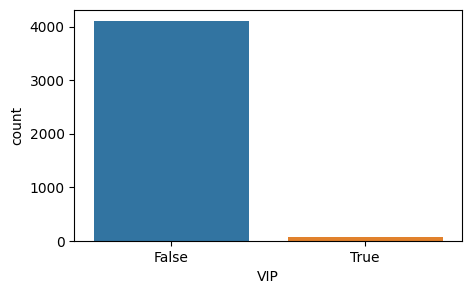

In [56]:
plt.figure(figsize=(5, 3))
sns.countplot(x=test_df['VIP'])

In [57]:
test_df = test_df.fillna({'VIP':test_df['VIP'].mode()[0]})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [58]:
test_df['Age'].mean()

28.65814620162446

In [59]:
test_df['Age'].median()

26.0

In [60]:
test_df = test_df.fillna({'Age': test_df['Age'].mean()})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [61]:
test_df['RoomService'].mean()

219.26626936829558

In [62]:
test_df['RoomService'].median()

0.0

<Axes: >

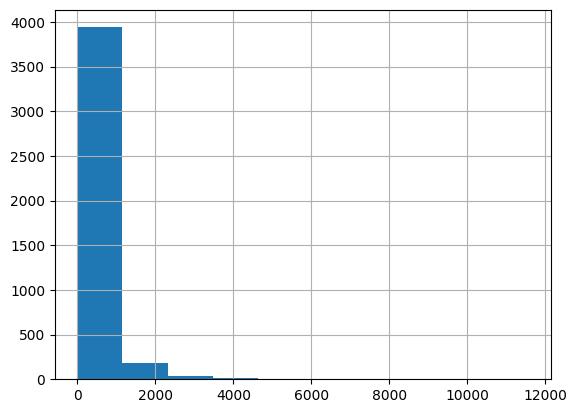

In [63]:
test_df['RoomService'].hist()

In [64]:
test_df = test_df.fillna({'RoomService': test_df['RoomService'].median()})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

<Axes: >

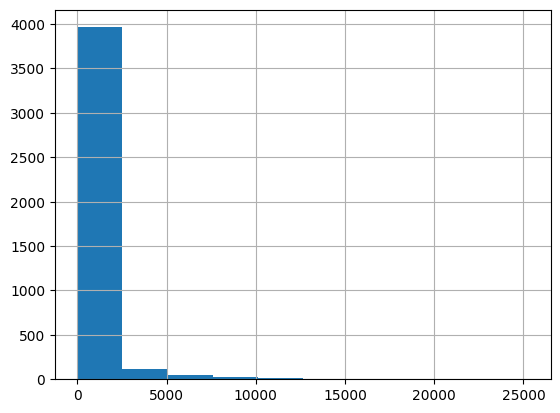

In [65]:
test_df['FoodCourt'].hist()

In [66]:
test_df = test_df.fillna({'FoodCourt': test_df['FoodCourt'].median()})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

<Axes: >

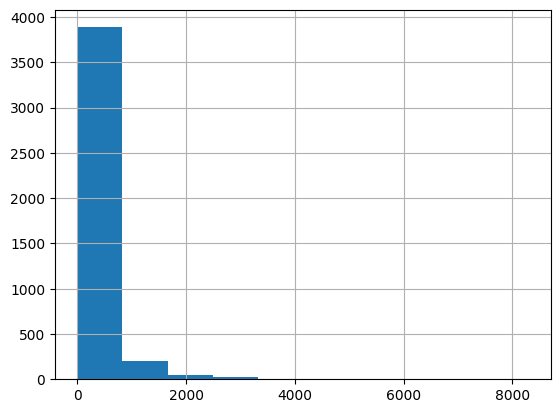

In [67]:
test_df['ShoppingMall'].hist()

In [68]:
test_df = test_df.fillna({'ShoppingMall': test_df['ShoppingMall'].median()})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             101
VRDeck           80
dtype: int64

<Axes: >

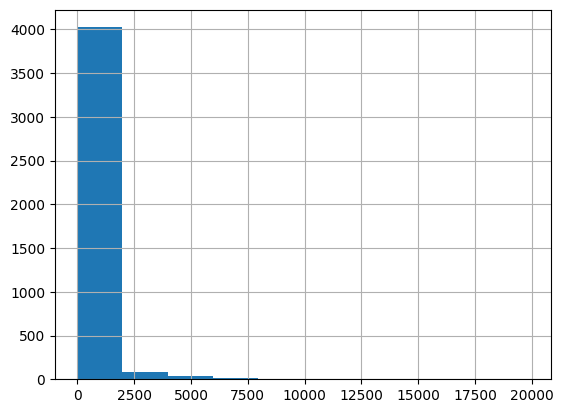

In [69]:
test_df['Spa'].hist()

In [70]:
test_df = test_df.fillna({'Spa': test_df['Spa'].median()})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck           80
dtype: int64

<Axes: >

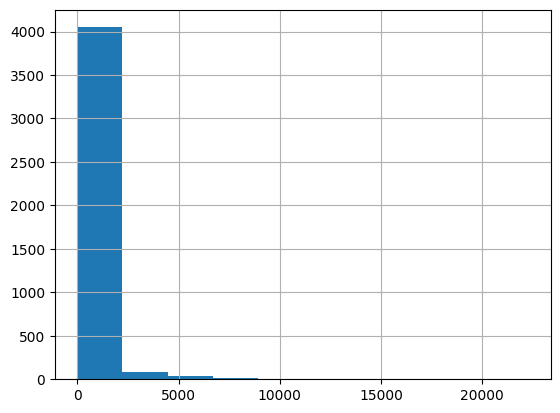

In [71]:
test_df['VRDeck'].hist()

In [72]:
test_df = test_df.fillna({'VRDeck': test_df['VRDeck'].median()})
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [73]:
test_df[['Deck','Num','Side']] = test_df['Cabin'].str.split('/',expand=True)
test_df = test_df.drop(['Cabin'],axis=1)

test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Deck            100
Num             100
Side            100
dtype: int64

In [74]:
test_df['Deck'].fillna(test_df['Deck'].mode()[0],inplace=True)
test_df['Num'].fillna(test_df['Num'].mode()[0],inplace=True)
test_df['Side'].fillna(test_df['Side'].mode()[0],inplace=True)

test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

In [75]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_df['HomePlanet'])

le.transform(train_df['HomePlanet'])

train_df['HomePlanet'] = le.transform(train_df['HomePlanet'])

train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,0,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,0,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,1,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [77]:
train_df['HomePlanet'].unique()

array([1, 0, 2])

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_df['Destination'])

le.transform(train_df['Destination'])

train_df['Destination'] = le.transform(train_df['Destination'])

train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_df['Deck'])

le.transform(train_df['Deck'])

train_df['Deck'] = le.transform(train_df['Deck'])

train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,P
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,S
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,S
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,S
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,98,P
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1499,S
8690,9279_01,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1500,S
8691,9280_01,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,608,S


In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_df['Side'])

le.transform(train_df['Side'])

train_df['Side'] = le.transform(train_df['Side'])

train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1499,1
8690,9279_01,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1
8691,9280_01,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1


<Axes: xlabel='Deck', ylabel='count'>

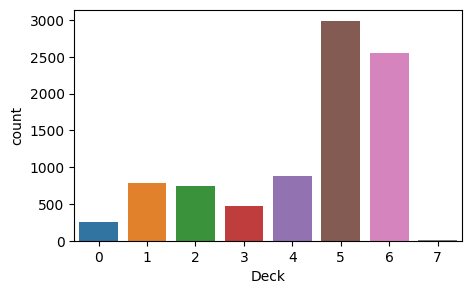

In [81]:
plt.figure(figsize=(5, 3))
sns.countplot(x=train_df['Deck'])

<Axes: xlabel='Side', ylabel='count'>

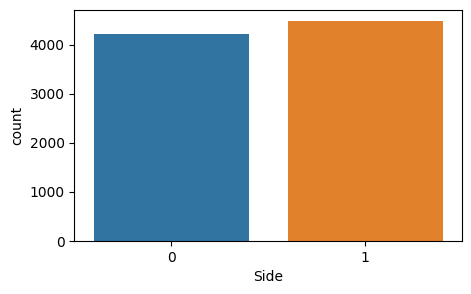

In [82]:
plt.figure(figsize=(5, 3))
sns.countplot(x=train_df['Side'])

In [83]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1


- PassengerId


⇒家族の人数を表すカラムを追加して、IDのカラムは削除する


- CryoSleep・VIP・Transported


⇒ワンホットエンコーディングでダミー変数化


- RoomService・FoodCourt・ShoppingMall・Spa・VRDeck


⇒1以上のデータを1に置換し、「利用したかどうか」を表すカラムにする

In [84]:
train_df[['Passenger','ID']] = train_df['PassengerId'].str.split('_',expand=True)
#train_df = train_df.drop(['PassengerId'],axis=1)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Passenger,ID
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0001,01
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1,0002,01
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0003,01
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0003,02
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1,0004,01


In [85]:
train_df_family = train_df.groupby(['Passenger'])['ID'].nunique()
train_df_family = train_df_family.to_frame(name='num')
train_df_family

,num
Passenger,
0001,1
0002,1
0003,2
0004,1
0005,1
...,...
9275,3
9276,1
9278,1


In [86]:
train_family = train_df_family.values
#train_family = train_family.to_frame(name='family')
train_family
#train_df_family = train_df_family.to_frame(name='num')

array([[1],
       [1],
       [2],
       ...,
       [1],
       [1],
       [2]])

In [87]:
train_family[0]

array([1])

In [88]:
train_df_passenger = train_df['Passenger'].unique()
train_df_passenger

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [89]:
train_df_passenger.size

6217

In [90]:
train_df_passenger = train_df_passenger.reshape(6217,1)
train_df_passenger.shape

(6217, 1)

In [91]:
train_df_passenger

array([['0001'],
       ['0002'],
       ['0003'],
       ...,
       ['9278'],
       ['9279'],
       ['9280']], dtype=object)

In [92]:
train_df_t = pd.DataFrame(train_df_passenger,columns=['Passenger'])
train_df_t

,Passenger
0,0001
1,0002
2,0003
3,0004
4,0005
...,...
6212,9275
6213,9276
6214,9278
6215,9279


In [93]:
train_df_f = pd.DataFrame(train_family,columns=['family'])
train_df_f

,family
0,1
1,1
2,2
3,1
4,1
...,...
6212,3
6213,1
6214,1
6215,1


In [94]:
train_df1 = pd.concat([train_df_f,train_df_t],axis=1,ignore_index=True)
train_df1

,0,1
0,1,0001
1,1,0002
2,2,0003
3,1,0004
4,1,0005
...,...,...
6212,3,9275
6213,1,9276
6214,1,9278
6215,1,9279


In [95]:
train_df1.columns = ['family','Passenger']
train_df1 

,family,Passenger
0,1,0001
1,1,0002
2,2,0003
3,1,0004
4,1,0005
...,...,...
6212,3,9275
6213,1,9276
6214,1,9278
6215,1,9279


In [96]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Passenger,ID
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0001,01
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1,0002,01
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0003,01
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0003,02
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0,9276,01
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1499,1,9278,01
8690,9279_01,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1,9279,01
8691,9280_01,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1,9280,01


In [97]:
train_df['family'] = 0
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Passenger,ID,family
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0001,01,0
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1,0002,01,0
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0003,01,0
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0003,02,0
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1,0004,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0,9276,01,0
8689,9278_01,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1499,1,9278,01,0
8690,9279_01,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1,9279,01,0
8691,9280_01,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1,9280,01,0


In [98]:
train_df['family'][0]

0

In [99]:
for i in range(0,8693):
  train_df['family'][i] = train_df1.loc[(train_df1['Passenger'] == train_df['Passenger'][i]),'family']
  
train_df.head()

<ipython-input-99-2a5b3a18530b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['family'][i] = train_df1.loc[(train_df1['Passenger'] == train_df['Passenger'][i]),'family']


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Passenger,ID,family
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0001,01,1
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1,0002,01,1
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,0003,01,2
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,0003,02,2
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1,0004,01,1


In [100]:
train_df_r = train_df.drop(['PassengerId','Passenger','ID'],axis=1)
train_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,family
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1,1
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,2
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,2
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0,1
8689,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0,False,6,1499,1,1
8690,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1,1
8691,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1,2


In [101]:
le.fit(train_df_r['VIP'])

le.transform(train_df_r['VIP'])

train_df_r['VIP'] = le.transform(train_df_r['VIP'])

train_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,family
0,1,False,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,0,False,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1,1
2,1,False,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,2
3,1,False,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,2
4,0,False,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0,1
8689,0,True,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,1499,1,1
8690,0,False,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1,1
8691,1,False,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1,2


In [102]:
le.fit(train_df_r['CryoSleep'])

le.transform(train_df_r['CryoSleep'])

train_df_r['CryoSleep'] = le.transform(train_df_r['CryoSleep'])

train_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,family
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1,2
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1,2
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0,1
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,1499,1,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1,2


In [103]:
train_df_r['RoomService'] = train_df_r['RoomService'].mask(train_df_r['RoomService'] > 1, 1)
train_df_r['FoodCourt'] = train_df_r['FoodCourt'].mask(train_df_r['FoodCourt'] > 1, 1)
train_df_r['ShoppingMall'] = train_df_r['ShoppingMall'].mask(train_df_r['ShoppingMall'] > 1, 1)
train_df_r['Spa'] = train_df_r['Spa'].mask(train_df_r['Spa'] > 1, 1)
train_df_r['VRDeck'] = train_df_r['VRDeck'].mask(train_df_r['VRDeck'] > 1, 1)

train_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,family
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,0,0,2,24.0,0,1.0,1.0,1.0,1.0,1.0,True,5,0,1,1
2,1,0,2,58.0,1,1.0,1.0,0.0,1.0,1.0,False,0,0,1,2
3,1,0,2,33.0,0,0.0,1.0,1.0,1.0,1.0,False,0,0,1,2
4,0,0,2,16.0,0,1.0,1.0,1.0,1.0,1.0,True,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,1.0,0.0,1.0,1.0,False,0,98,0,1
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,1499,1,1
8690,0,0,2,26.0,0,0.0,0.0,1.0,1.0,0.0,True,6,1500,1,1
8691,1,0,0,32.0,0,0.0,1.0,0.0,1.0,1.0,False,4,608,1,2


In [104]:
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

In [105]:
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,4,S
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [106]:
le.fit(test_df['HomePlanet'])

le.transform(test_df['HomePlanet'])

test_df['HomePlanet'] = le.transform(test_df['HomePlanet'])

test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,0,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,0,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,1,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,1,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,0,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,9269_01,0,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,4,S
4274,9271_01,2,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,9273_01,1,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [107]:
le.fit(test_df['Destination'])

le.transform(test_df['Destination'])

test_df['Destination'] = le.transform(test_df['Destination'])

test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,9269_01,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,4,S
4274,9271_01,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,9273_01,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [108]:
le.fit(test_df['Deck'])

le.transform(test_df['Deck'])

test_df['Deck'] = le.transform(test_df['Deck'])

test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,6,3,S
1,0018_01,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,5,4,S
2,0019_01,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,2,0,S
3,0021_01,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2,1,S
4,0023_01,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,6,1496,S
4273,9269_01,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,5,4,S
4274,9271_01,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,3,296,P
4275,9273_01,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,3,297,P


In [109]:
le.fit(test_df['Side'])

le.transform(test_df['Side'])

test_df['Side'] = le.transform(test_df['Side'])

test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0018_01,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,0019_01,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,2,0,1
3,0021_01,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0023_01,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,6,1496,1
4273,9269_01,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,5,4,1
4274,9271_01,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,3,296,0
4275,9273_01,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,3,297,0


In [110]:
test_df[['Passenger','ID']] = test_df['PassengerId'].str.split('_',expand=True)

test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Passenger,ID
0,0013_01,0,True,2,27.0,False,0.0,0.0,0.0,0.0,0.0,6,3,1,0013,01
1,0018_01,0,False,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,4,1,0018,01
2,0019_01,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,0,1,0019,01
3,0021_01,1,False,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1,1,0021,01
4,0023_01,0,False,2,20.0,False,10.0,0.0,635.0,0.0,0.0,5,5,1,0023,01


In [111]:
test_df_family = test_df.groupby(['Passenger'])['ID'].nunique()
test_df_family = test_df_family.to_frame(name='num')
test_df_family

,num
Passenger,
0013,1
0018,1
0019,1
0021,1
0023,1
...,...
9266,2
9269,1
9271,1


In [112]:
test_family = test_df_family.values
#test_family = test_family.to_frame(name='family')
test_family
#test_df_family = test_df_family.to_frame(name='num')

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [113]:
test_family[0]

array([1])

In [114]:
test_df_passenger = test_df['Passenger'].unique()

In [115]:
test_df_passenger.size

3063

In [116]:
test_df_passenger = test_df_passenger.reshape(3063,1)
test_df_passenger.shape

(3063, 1)

In [117]:
test_df_passenger

array([['0013'],
       ['0018'],
       ['0019'],
       ...,
       ['9271'],
       ['9273'],
       ['9277']], dtype=object)

In [118]:
test_df_t = pd.DataFrame(test_df_passenger,columns=['Passenger'])
test_df_t

,Passenger
0,0013
1,0018
2,0019
3,0021
4,0023
...,...
3058,9266
3059,9269
3060,9271
3061,9273


In [119]:
test_df_f = pd.DataFrame(test_family,columns=['family'])
test_df_f

,family
0,1
1,1
2,1
3,1
4,1
...,...
3058,2
3059,1
3060,1
3061,1


In [120]:
test_df1 = pd.concat([test_df_f,test_df_t],axis=1,ignore_index=True)
test_df1

,0,1
0,1,0013
1,1,0018
2,1,0019
3,1,0021
4,1,0023
...,...,...
3058,2,9266
3059,1,9269
3060,1,9271
3061,1,9273


In [121]:
test_df1.columns = ['family','Passenger']
test_df1

,family,Passenger
0,1,0013
1,1,0018
2,1,0019
3,1,0021
4,1,0023
...,...,...
3058,2,9266
3059,1,9269
3060,1,9271
3061,1,9273


In [122]:
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Passenger,ID
0,0013_01,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,6,3,1,0013,01
1,0018_01,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,5,4,1,0018,01
2,0019_01,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,2,0,1,0019,01
3,0021_01,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2,1,1,0021,01
4,0023_01,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,5,1,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,6,1496,1,9266,02
4273,9269_01,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,5,4,1,9269,01
4274,9271_01,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,3,296,0,9271,01
4275,9273_01,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,3,297,0,9273,01


In [123]:
test_df['family'] = 0
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Passenger,ID,family
0,0013_01,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,6,3,1,0013,01,0
1,0018_01,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,5,4,1,0018,01,0
2,0019_01,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,2,0,1,0019,01,0
3,0021_01,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2,1,1,0021,01,0
4,0023_01,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,5,1,0023,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,6,1496,1,9266,02,0
4273,9269_01,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,5,4,1,9269,01,0
4274,9271_01,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,3,296,0,9271,01,0
4275,9273_01,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,3,297,0,9273,01,0


In [124]:
test_df['family'][0]

0

In [125]:
for i in range(0,4277):
    test_df['family'][i] = test_df1.loc[(test_df1['Passenger'] == test_df['Passenger'][i]),'family']

test_df

<ipython-input-125-646b9da20235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['family'][i] = test_df1.loc[(test_df1['Passenger'] == test_df['Passenger'][i]),'family']


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Passenger,ID,family
0,0013_01,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,6,3,1,0013,01,1
1,0018_01,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,5,4,1,0018,01,1
2,0019_01,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,2,0,1,0019,01,1
3,0021_01,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2,1,1,0021,01,1
4,0023_01,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,5,1,0023,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,6,1496,1,9266,02,2
4273,9269_01,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,5,4,1,9269,01,1
4274,9271_01,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,3,296,0,9271,01,1
4275,9273_01,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,3,297,0,9273,01,1


In [126]:
test_df_r = test_df.drop(['PassengerId','Passenger','ID'],axis=1)
test_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,family
0,0,True,2,27.000000,False,0.0,0.0,0.0,0.0,0.0,6,3,1,1
1,0,False,2,19.000000,False,0.0,9.0,0.0,2823.0,0.0,5,4,1,1
2,1,True,0,31.000000,False,0.0,0.0,0.0,0.0,0.0,2,0,1,1
3,1,False,2,38.000000,False,0.0,6652.0,0.0,181.0,585.0,2,1,1,1
4,0,False,2,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,34.000000,False,0.0,0.0,0.0,0.0,0.0,6,1496,1,2
4273,0,False,2,42.000000,False,0.0,847.0,17.0,10.0,144.0,5,4,1,1
4274,2,True,0,28.658146,False,0.0,0.0,0.0,0.0,0.0,3,296,0,1
4275,1,False,2,28.658146,False,0.0,2680.0,0.0,0.0,523.0,3,297,0,1


In [127]:
le.fit(test_df_r['VIP'])

le.transform(test_df_r['VIP'])

test_df_r['VIP'] = le.transform(test_df_r['VIP'])

test_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,family
0,0,True,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,6,3,1,1
1,0,False,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,5,4,1,1
2,1,True,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,2,0,1,1
3,1,False,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,1
4,0,False,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,True,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,6,1496,1,2
4273,0,False,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,5,4,1,1
4274,2,True,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,3,296,0,1
4275,1,False,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,3,297,0,1


In [128]:
le.fit(test_df_r['CryoSleep'])

le.transform(test_df_r['CryoSleep'])

test_df_r['CryoSleep'] = le.transform(test_df_r['CryoSleep'])

test_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,family
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,6,3,1,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,5,4,1,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,2,0,1,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,6,1496,1,2
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,5,4,1,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,3,296,0,1
4275,1,0,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0,3,297,0,1


In [129]:
test_df_r['RoomService'] = test_df_r['RoomService'].mask(test_df_r['RoomService'] > 1, 1)
test_df_r['FoodCourt'] = test_df_r['FoodCourt'].mask(test_df_r['FoodCourt'] > 1, 1)
test_df_r['ShoppingMall'] = test_df_r['ShoppingMall'].mask(test_df_r['ShoppingMall'] > 1, 1)
test_df_r['Spa'] = test_df_r['Spa'].mask(test_df_r['Spa'] > 1, 1)
test_df_r['VRDeck'] = test_df_r['VRDeck'].mask(test_df_r['VRDeck'] > 1, 1)

test_df_r

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,family
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,6,3,1,1
1,0,0,2,19.000000,0,0.0,1.0,0.0,1.0,0.0,5,4,1,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,2,0,1,1
3,1,0,2,38.000000,0,0.0,1.0,0.0,1.0,1.0,2,1,1,1
4,0,0,2,20.000000,0,1.0,0.0,1.0,0.0,0.0,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,6,1496,1,2
4273,0,0,2,42.000000,0,0.0,1.0,1.0,1.0,1.0,5,4,1,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,3,296,0,1
4275,1,0,2,28.658146,0,0.0,1.0,0.0,0.0,1.0,3,297,0,1


In [130]:
x_train = train_df_r.drop(['Transported'],axis=1)
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,family
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,0,0,2,24.0,0,1.0,1.0,1.0,1.0,1.0,5,0,1,1
2,1,0,2,58.0,1,1.0,1.0,0.0,1.0,1.0,0,0,1,2
3,1,0,2,33.0,0,0.0,1.0,1.0,1.0,1.0,0,0,1,2
4,0,0,2,16.0,0,1.0,1.0,1.0,1.0,1.0,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,1.0,0.0,1.0,1.0,0,98,0,1
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1499,1,1
8690,0,0,2,26.0,0,0.0,0.0,1.0,1.0,0.0,6,1500,1,1
8691,1,0,0,32.0,0,0.0,1.0,0.0,1.0,1.0,4,608,1,2


In [131]:
x_test = test_df_r
x_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,family
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,6,3,1,1
1,0,0,2,19.000000,0,0.0,1.0,0.0,1.0,0.0,5,4,1,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,2,0,1,1
3,1,0,2,38.000000,0,0.0,1.0,0.0,1.0,1.0,2,1,1,1
4,0,0,2,20.000000,0,1.0,0.0,1.0,0.0,0.0,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,6,1496,1,2
4273,0,0,2,42.000000,0,0.0,1.0,1.0,1.0,1.0,5,4,1,1
4274,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,3,296,0,1
4275,1,0,2,28.658146,0,0.0,1.0,0.0,0.0,1.0,3,297,0,1


In [132]:
y_train = train_df_r['Transported']
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [133]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [134]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3,max_depth=2,random_state=0)

model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=0)

In [135]:
#from sklearn.svm import SVC
#model = SVC(kernel='rbf',random_state=0)
#model.fit(x_train,y_train)

In [136]:
y_test = model.predict(x_test)

In [137]:
y_test

array([ True, False,  True, ...,  True,  True,  True])

In [138]:
y_test = np.where(y_test, 'True', 'False').tolist()
print(y_test)

['True', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'False', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'True', 'True', 'False', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'True',

In [139]:
data = pd.DataFrame(y_test,columns=['Transported'])

In [140]:
data.head()

,Transported
0,True
1,False
2,True
3,False
4,False


In [141]:
data1 = pd.DataFrame(test_df.PassengerId)

In [142]:
data1.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [143]:
result = pd.concat([data1,data],axis=1)
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [144]:
result.to_csv('kagglespaceshiptitanic.csv',index=False)